# Preprocessing and Exploring for Iris Dataset

## Loading dataset 'Iris'

In [3]:
# import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Preprocessing

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Check for missing values
print('Missing values per column:')
print(iris_df.isnull().sum())

# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(iris_df[iris.feature_names])
iris_df_scaled = pd.DataFrame(features_scaled, columns=iris.feature_names)

# One-hot encode the class label
# Use 'sparse_output=False' for scikit-learn >= 1.2
# newer scikit-learn versions use the code below
try:
    ohe = OneHotEncoder(sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(sparse=False)
target_encoded = ohe.fit_transform(iris_df[['target']])
target_encoded_df = pd.DataFrame(target_encoded, columns=[f'class_{int(i)}' for i in ohe.categories_[0]])

# Combine scaled features and encoded target
iris_preprocessed = pd.concat([iris_df_scaled, target_encoded_df], axis=1)

# Display the first few rows of the preprocessed data
iris_preprocessed.head()

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_0,class_1,class_2
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0


## Explore

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)     class_0     class_1     class_2  
count        150.000000  150.000000  150.000000  150.000000  
mean           0.458056    0.333333    0.333333    0.333333  
std            0.317599    0.472984    0.472984    0.472984  
min            0.000000    0.000000    0.000000    0.000000  
25%            0.083333    0.000000    0.000000    0.000000  
50%            0.50000

c:\Users\Makena\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


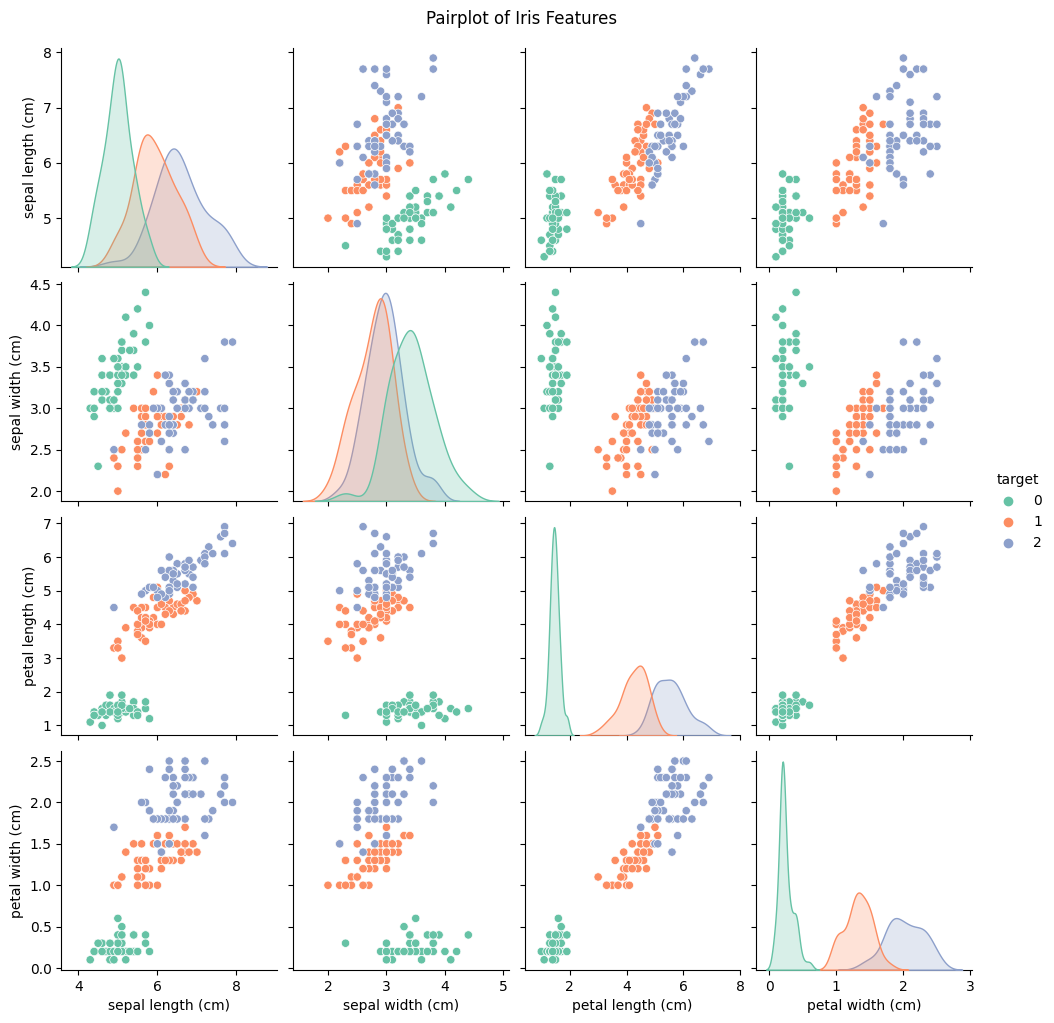

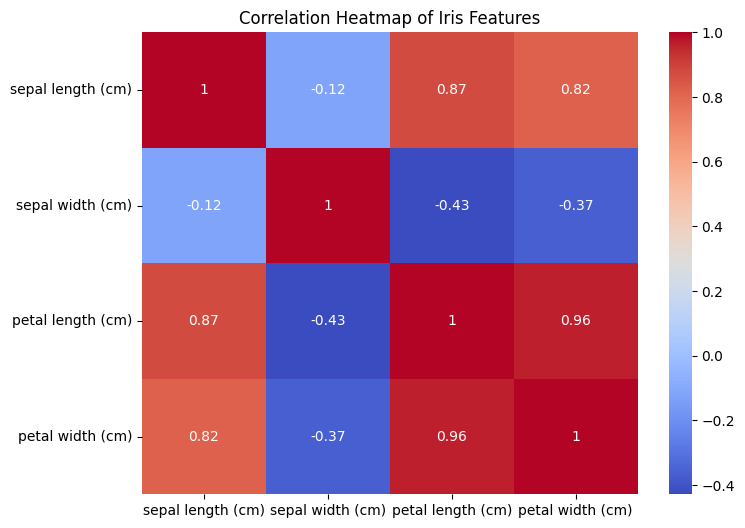

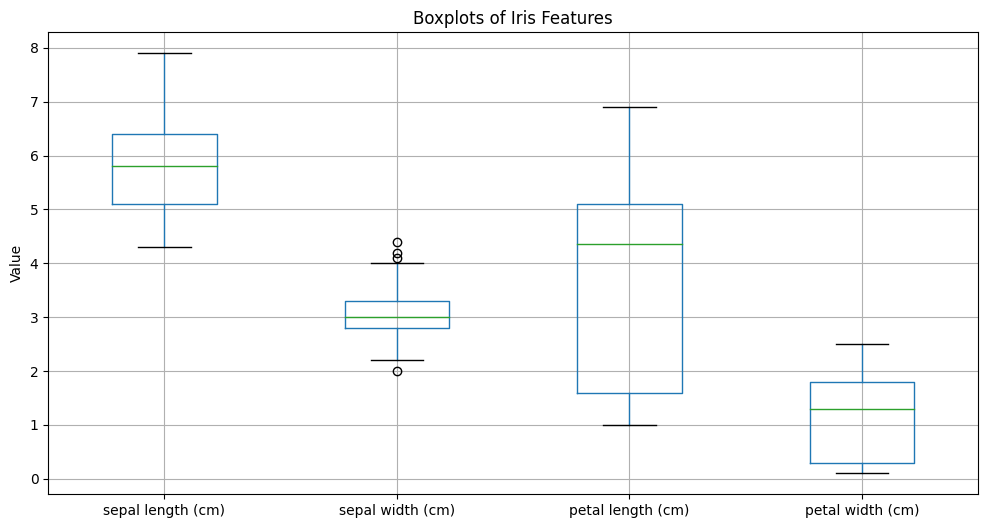

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print('Summary statistics:')
print(iris_preprocessed.describe())

# Pairplot (using original features and target)
sns.pairplot(iris_df, hue='target', palette='Set2')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.savefig(r'C:\Users\Makena\OneDrive\Desktop\USIU\2nd Summer sem\DWM\End sem\DSA-2040_Practical_Exam_Mitchel_413\images\pairplot_iris_features.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(iris_df[iris.feature_names].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Features')
plt.savefig(r'C:\Users\Makena\OneDrive\Desktop\USIU\2nd Summer sem\DWM\End sem\DSA-2040_Practical_Exam_Mitchel_413\images\correlation_heatmap_iris_features.png')
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12,6))
iris_df[iris.feature_names].boxplot()
plt.title('Boxplots of Iris Features')
plt.ylabel('Value')
plt.savefig(r'C:\Users\Makena\OneDrive\Desktop\USIU\2nd Summer sem\DWM\End sem\DSA-2040_Practical_Exam_Mitchel_413\images\boxplots_iris_features.png')
plt.show()

## Splitting data into train/test

In [10]:
from sklearn.model_selection import train_test_split

def split_train_test(df, test_size=0.2, random_state=42):
    """
    Splits the input DataFrame into train and test sets.
    Returns: train_df, test_df
    """
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
    print(f'Train shape: {train_df.shape}, Test shape: {test_df.shape}')
    return train_df, test_df

# Example usage:
train_df, test_df = split_train_test(iris_preprocessed)

Train shape: (120, 7), Test shape: (30, 7)
